# Machine Learning

In this file, instructions how to approach the challenge can be found.

We are going to work on different types of Machine Learning problems:

- **Regression Problem**: The goal is to predict delay of flights.
- **(Stretch) Multiclass Classification**: If the plane was delayed, we will predict what type of delay it is (will be).
- **(Stretch) Binary Classification**: The goal is to predict if the flight will be cancelled.

In [1]:
import numpy as np
import pandas as pd
#Import dataframe flights
flights_test = pd.read_csv("flights_test.csv",low_memory=False).drop('Unnamed: 0',axis=1)
flights = pd.read_csv("flights.csv",low_memory=False).drop('Unnamed: 0',axis=1)[list(flights_test.columns)+['arr_delay','taxi_in','taxi_out']]

In [2]:
flights=flights.dropna()


## Main Task: Regression Problem

The target variable is **ARR_DELAY**. We need to be careful which columns to use and which don't. For example, DEP_DELAY is going to be the perfect predictor, but we can't use it because in real-life scenario, we want to predict the delay before the flight takes of --> We can use average delay from earlier days but not the one from the actual flight we predict.  

For example, variables **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY** shouldn't be used directly as predictors as well. However, we can create various transformations from earlier values.

We will be evaluating your models by predicting the ARR_DELAY for all flights **1 week in advance**.

In [3]:
def time_machine(df):
    df['months']=df.fl_date.str[5:7].astype(int)
    df['weekday']=pd.to_datetime(df.fl_date).dt.dayofweek
time_machine(flights)
time_machine(flights_test)

In [4]:
def traffic(df):
    origin_traffic=df.groupby(['fl_date','origin']).sum()[['flights']].reset_index().rename({'flights': 'origin_traffic'}, axis='columns')
    dest_traffic=df.groupby(['fl_date','dest']).sum()[['flights']].reset_index().rename({'flights': 'dest_traffic'}, axis='columns')
    df = pd.merge(df, origin_traffic, on=['fl_date','origin'])
    df=pd.merge(df, dest_traffic, on=['fl_date','dest'])
    return df

In [5]:
flights_test=traffic(flights_test)
flights=traffic(flights)

In [6]:
def time_to_mins(df):
    df['crs_dep_time(mins)']=((df.crs_dep_time//100)*60)+df.crs_dep_time-(df.crs_dep_time//100)*100
    df['crs_arr_time(mins)']=((df.crs_arr_time//100)*60)+df.crs_arr_time-(df.crs_arr_time//100)*100

In [7]:
time_to_mins(flights)

In [8]:
time_to_mins(flights_test)

In [9]:
def taxi_Med(df):
    origin_taxi=flights.groupby('origin').taxi_out.median().to_frame().reset_index().rename({'taxi_out': 'origin_taxi'},axis='columns')
    dest_taxi=flights.groupby('dest').taxi_in.median().to_frame().reset_index().rename({'taxi_in': 'dest_taxi'},axis='columns')
    df=pd.merge(df,origin_taxi , on='origin')  
    df=pd.merge(df, dest_taxi, on='dest')
    return df


In [10]:
flights_test=taxi_Med(flights_test)
flights=taxi_Med(flights)

In [11]:
def one_hot(df):
    df = df.join(pd.get_dummies(df.mkt_carrier))
    return df

In [12]:
flights_test=one_hot(flights_test)

In [13]:
flights=one_hot(flights)

In [14]:
features=['crs_dep_time(mins)','crs_arr_time(mins)','crs_elapsed_time','distance','months','weekday','origin_traffic','dest_traffic','origin_taxi','dest_taxi']+list(flights_test.mkt_unique_carrier.unique())


#'mkt_carrier_fl_num'

In [15]:
y=flights.arr_delay
flights=flights[features]
flights_test=flights_test[features]




#1 0.1

In [16]:
flights

,crs_dep_time(mins),crs_arr_time(mins),crs_elapsed_time,distance,months,weekday,origin_traffic,dest_traffic,origin_taxi,dest_taxi,WN,UA,AS,AA,DL,B6,F9,HA,NK,G4
0,490,685,135.0,853.0,10,0,277.0,789.0,15.0,7.0,1,0,0,0,0,0,0,0,0,0
1,935,1130,135.0,853.0,10,0,277.0,789.0,15.0,7.0,1,0,0,0,0,0,0,0,0,0
2,805,1000,135.0,853.0,10,0,277.0,789.0,15.0,7.0,1,0,0,0,0,0,0,0,0,0
3,630,825,135.0,853.0,10,0,277.0,789.0,15.0,7.0,1,0,0,0,0,0,0,0,0,0
4,971,1165,134.0,853.0,10,0,277.0,789.0,15.0,7.0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15609660,810,845,35.0,73.0,3,4,5.0,1.0,10.0,5.0,0,1,0,0,0,0,0,0,0,0
15609661,810,845,35.0,73.0,3,6,5.0,1.0,10.0,5.0,0,1,0,0,0,0,0,0,0,0
15609662,810,845,35.0,73.0,3,0,5.0,1.0,10.0,5.0,0,1,0,0,0,0,0,0,0,0
15609663,810,845,35.0,73.0,3,3,5.0,1.0,10.0,5.0,0,1,0,0,0,0,0,0,0,0


In [17]:
flights.columns

Index(['crs_dep_time(mins)', 'crs_arr_time(mins)', 'crs_elapsed_time',
       'distance', 'months', 'weekday', 'origin_traffic', 'dest_traffic',
       'origin_taxi', 'dest_taxi', 'WN', 'UA', 'AS', 'AA', 'DL', 'B6', 'F9',
       'HA', 'NK', 'G4'],
      dtype='object')

In [18]:
y

0            4.0
1            7.0
2           -2.0
3            3.0
4          -15.0
            ... 
15609660     5.0
15609661    -5.0
15609662   -10.0
15609663    10.0
15609664     5.0
Name: arr_delay, Length: 15609665, dtype: float64

In [20]:
flights

,crs_dep_time(mins),crs_arr_time(mins),crs_elapsed_time,distance,months,weekday,origin_traffic,dest_traffic,origin_taxi,dest_taxi,WN,UA,AS,AA,DL,B6,F9,HA,NK,G4
0,490,685,135.0,853.0,10,0,277.0,789.0,15.0,7.0,1,0,0,0,0,0,0,0,0,0
1,935,1130,135.0,853.0,10,0,277.0,789.0,15.0,7.0,1,0,0,0,0,0,0,0,0,0
2,805,1000,135.0,853.0,10,0,277.0,789.0,15.0,7.0,1,0,0,0,0,0,0,0,0,0
3,630,825,135.0,853.0,10,0,277.0,789.0,15.0,7.0,1,0,0,0,0,0,0,0,0,0
4,971,1165,134.0,853.0,10,0,277.0,789.0,15.0,7.0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15609660,810,845,35.0,73.0,3,4,5.0,1.0,10.0,5.0,0,1,0,0,0,0,0,0,0,0
15609661,810,845,35.0,73.0,3,6,5.0,1.0,10.0,5.0,0,1,0,0,0,0,0,0,0,0
15609662,810,845,35.0,73.0,3,0,5.0,1.0,10.0,5.0,0,1,0,0,0,0,0,0,0,0
15609663,810,845,35.0,73.0,3,3,5.0,1.0,10.0,5.0,0,1,0,0,0,0,0,0,0,0


## Feature Engineering

Feature engineering will play a crucial role in this problems. We have only very little attributes so we need to create some features that will have some predictive power.

- weather: we can use some weather API to look for the weather in time of the scheduled departure and scheduled arrival.
- statistics (avg, mean, median, std, min, max...): we can take a look at previous delays and compute descriptive statistics
- airports encoding: we need to think about what to do with the airports and other categorical variables
- time of the day: the delay probably depends on the airport traffic which varies during the day.
- airport traffic
- unsupervised learning as feature engineering?
- **what are the additional options?**: Think about what we could do more to improve the model.

### Feature Selection / Dimensionality Reduction

We need to apply different selection techniques to find out which one will be the best for our problems.

- Original Features vs. PCA conponents?

In [21]:
from sklearn.preprocessing import RobustScaler
X=flights
transformer = RobustScaler().fit(X)
scaled_df=transformer.transform(X)



In [22]:
import matplotlib.pyplot as plt


In [46]:
from sklearn.decomposition import PCA

# Find the first 75 principle components of the dataset
pca = PCA(n_components=20)
pca.fit(scaled_df)

# Transform the data to its low-dimensional representation
reduced_faces = pca.transform(scaled_df)
print('Low-dimensional dataset shape: {}'.format(reduced_faces.shape))

Low-dimensional dataset shape: (15609665, 20)


Text(0, 0.5, '% Cumulative explained variance')

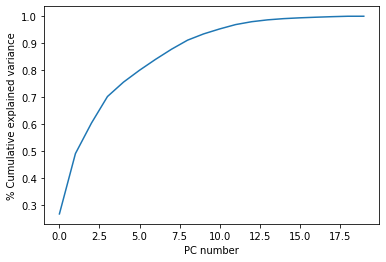

In [47]:
# See how well PCs explain variance in the dataset
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_explained_variance)
plt.xlabel('PC number')
plt.ylabel('% Cumulative explained variance')

In [79]:
pca = PCA(n_components=20)
pca.fit(scaled_df)

# Transform the data to its low-dimensional representation
reduced_fl = pca.transform(scaled_df)
print('Low-dimensional dataset shape: {}'.format(reduced_fl.shape))

Low-dimensional dataset shape: (15609665, 20)


### Modeling

Use different ML techniques to predict each problem.

- linear / logistic / multinomial logistic regression
- Naive Bayes
- Random Forest
- SVM
- XGBoost
- The ensemble of your own choice

In [80]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [81]:
data_dmatrix = xgb.DMatrix(data=reduced_fl,label=y)

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reduced_fl, y, test_size=0.2, random_state=123)

In [83]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [84]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[09:31:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [85]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 49.964046


In [86]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=1,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)


ValueError: need at least one array to concatenate

In [ ]:
cv_results

In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))

In [87]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

0.008496441173292624

In [88]:
#Linear Regression with statsmodel
import statsmodels.api as sm
X = sm.add_constant(X_train) # adding a constant
lin_reg = sm.OLS(y_train,X)

model = lin_reg.fit()
print_model = model.summary()
print(print_model)
Xnew = sm.add_constant(X_test)
y_pred=model.predict(Xnew)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred,y_test)

                            OLS Regression Results                            
Dep. Variable:              arr_delay   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     8752.
Date:                Tue, 06 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:37:31   Log-Likelihood:            -6.6434e+07
No. Observations:            12487732   AIC:                         1.329e+08
Df Residuals:                12487711   BIC:                         1.329e+08
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4644      0.014    390.473      0.0

24.361782404393384

In [89]:
#Lasso Regression

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel

alpha = 0.0001
lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
lassoreg.fit(X_train,y_train)
y_pred = lassoreg.predict(X_test)

print(mean_absolute_error(y_pred,y_test))
print(lassoreg.coef_)

sel_ = SelectFromModel(Lasso(alpha, normalize=True, max_iter=1e5))
sel_.fit(X_train, y_train)
sel_.get_support()

24.336623852496846
[-0.19761958  0.10890965  2.58371104 -4.90840574  0.16620736  1.2822919
 -0.9963252   1.36610641 -2.92932602 -0.13255694  1.43895977  0.
 -0.34234188  5.47211671 -0.          2.92414114 -0.          0.55443929
 -4.85097032 -0.        ]


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True, False,  True,
        True, False])

In [90]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor #Import Random Forest Model

#Baseline
RFbase=RandomForestRegressor()
RFbase.fit(X_train,y_train.values.ravel())
y_baseRF=RFbase.predict(X_test)
print(RFbase.score(X_train,y_train),RFbase.score(X_test,y_test))

KeyboardInterrupt: 

### Evaluation

You have data from 2018 and 2019 to develop models. Use different evaluation metrics for each problem and compare the performance of different models.

You are required to predict delays on **out of sample** data from **first 7 days (1st-7th) of January 2020** and to share the file with LighthouseLabs. Sample submission can be found in the file **_sample_submission.csv_**

======================================================================
## Stretch Tasks

### Multiclass Classification

The target variables are **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY**. We need to do additional transformations because these variables are not binary but continuos. For each flight that was delayed, we need to have one of these variables as 1 and others 0.

It can happen that we have two types of delays with more than 0 minutes. In this case, take the bigger one as 1 and others as 0.

### Binary Classification

The target variable is **CANCELLED**. The main problem here is going to be huge class imbalance. We have only very little cancelled flights with comparison to all flights. It is important to do the right sampling before training and to choose correct evaluation metrics.